# Uganda University Admissions Visualization

This notebook explores visual insights based on Uganda university admission data, including:
- District clusters (Urban, Rural, Remote)
- Gender distribution
- Courses offered vs demographics
- Correlation heatmaps and geographical insights
- Estimating chances of admission


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')  # Updated name in newer matplotlib versions

# Load dataset
df = pd.read_excel('cleaned_clustered_admissions.xlsx')
df.head()

,no,formid,index_no,name,ge,uace_,dcode,dname,course_code,course_name,tot_wt,program_name,cluster,region
0,1,25APF900350094290048,U2789/905,Nimusiima Sandrah,F,2024,55.0,WAKISO,ACC,BSC. Accounting (EVE),42.7,BSC. Accounting (EVE),URBAN-CITY,CENTRAL
1,2,25APF561140686250786,U0025/529,Bulukuku Daniel Ephraim,M,2014,93.0,KIBUKU,ACC,BSC. Accounting (EVE),42.3,BSC. Accounting (EVE),RURAL-AGRICULTURAL,UNKNOWN
2,3,25APF530278631275455,U2977/518,Mirembe Elizabeth,F,2024,16.0,KAMPALA,ACC,BSC. Accounting (EVE),41.1,BSC. Accounting (EVE),URBAN-CITY,CENTRAL
3,4,25APF1346250173272930,U1664/712,Namata Martha,F,2024,33.0,MASAKA,ACC,BSC. Accounting (EVE),40.7,BSC. Accounting (EVE),URBAN-CITY,CENTRAL
4,5,25APF1553620758303031,U0004/754,Nakalema Joyce,F,2024,33.0,MASAKA,ACC,BSC. Accounting (EVE),40.3,BSC. Accounting (EVE),URBAN-CITY,CENTRAL


## Cluster Distribution of Intake

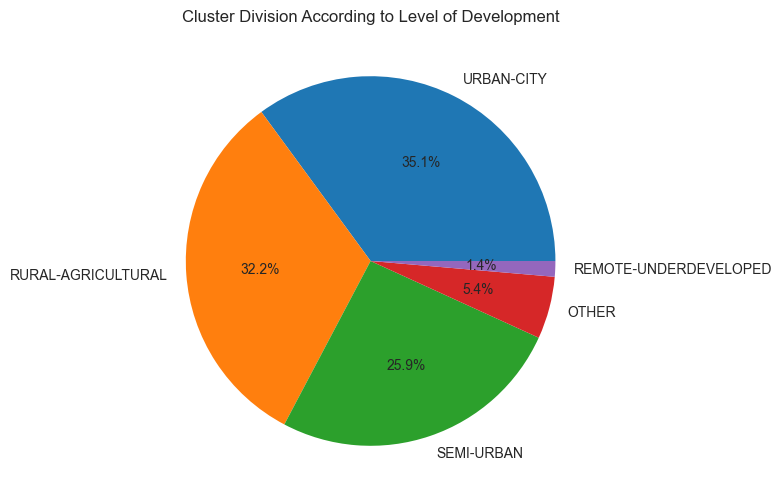

In [ ]:
# Pie chart of cluster distribution
cluster_dist = df['cluster'].value_counts()
cluster_dist.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Cluster Division According to Level of Development')
plt.ylabel('')
plt.savefig('cluster.png', dpi=300, bbox_inches='tight')

plt.show()

## Gender vs Cluster Admission Rate

In [4]:
print(df.columns.tolist())

['no', 'formid', 'index_no', 'name', 'ge', 'uace_', 'dcode', 'dname', 'course_code', 'course_name', 'tot_wt', 'program_name', 'cluster', 'region']


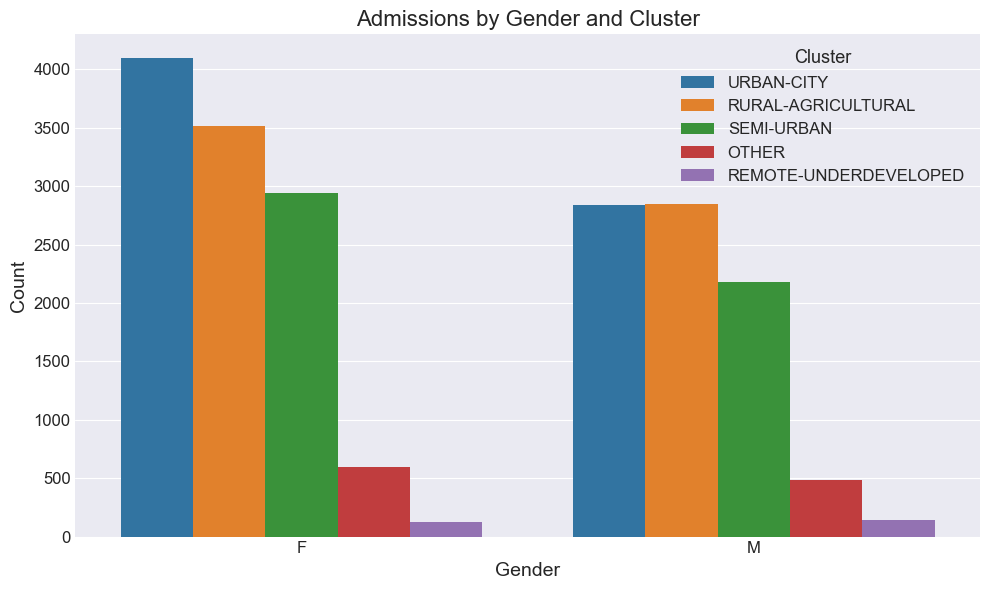

In [3]:
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(data=df, x='ge', hue='cluster')
plt.title('Admissions by Gender and Cluster', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.savefig('gender_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

## Heatmap: Gender vs District Admission Count

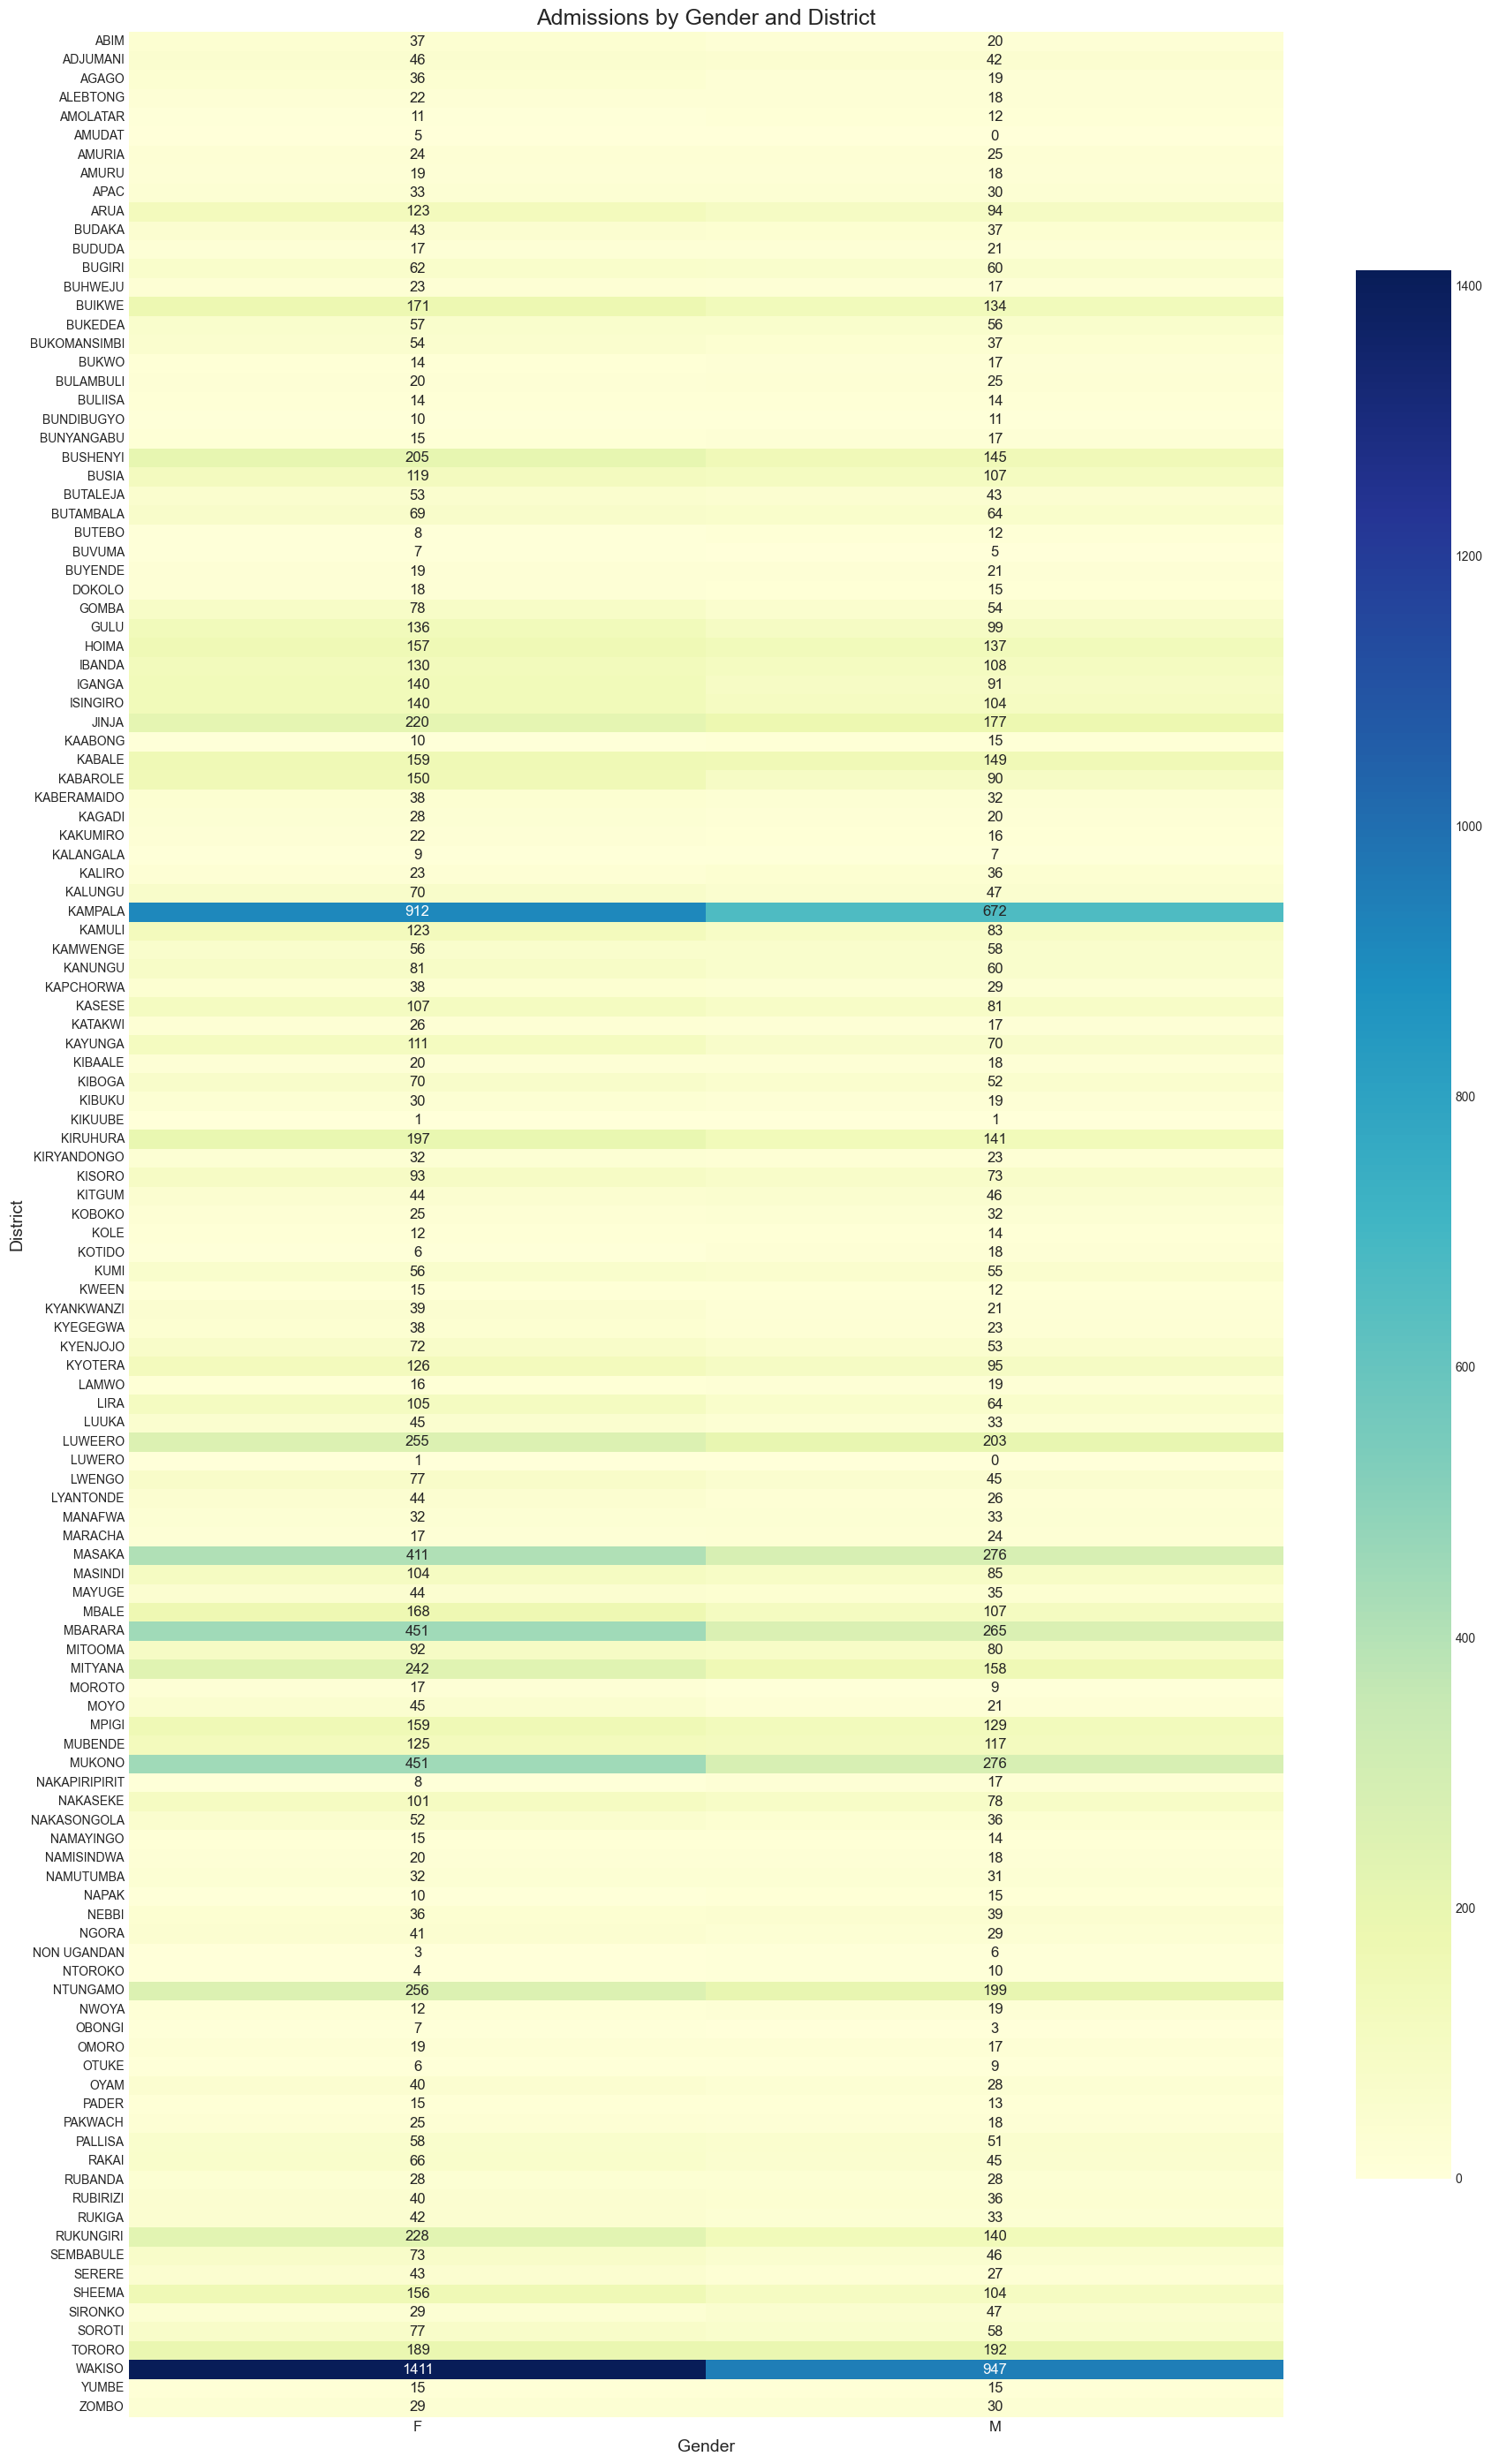

In [6]:
pivot_table = df.pivot_table(index='dname', columns='ge', aggfunc='size', fill_value=0)

plt.figure(figsize=(18, 28))  # Wider and taller for better readability
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    annot_kws={"size": 12},    # Annotation font size
    cbar_kws={"shrink": 0.8}   # Optional: shrink colorbar if too large
)

plt.title('Admissions by Gender and District', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('District', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Courses vs Gender Distribution

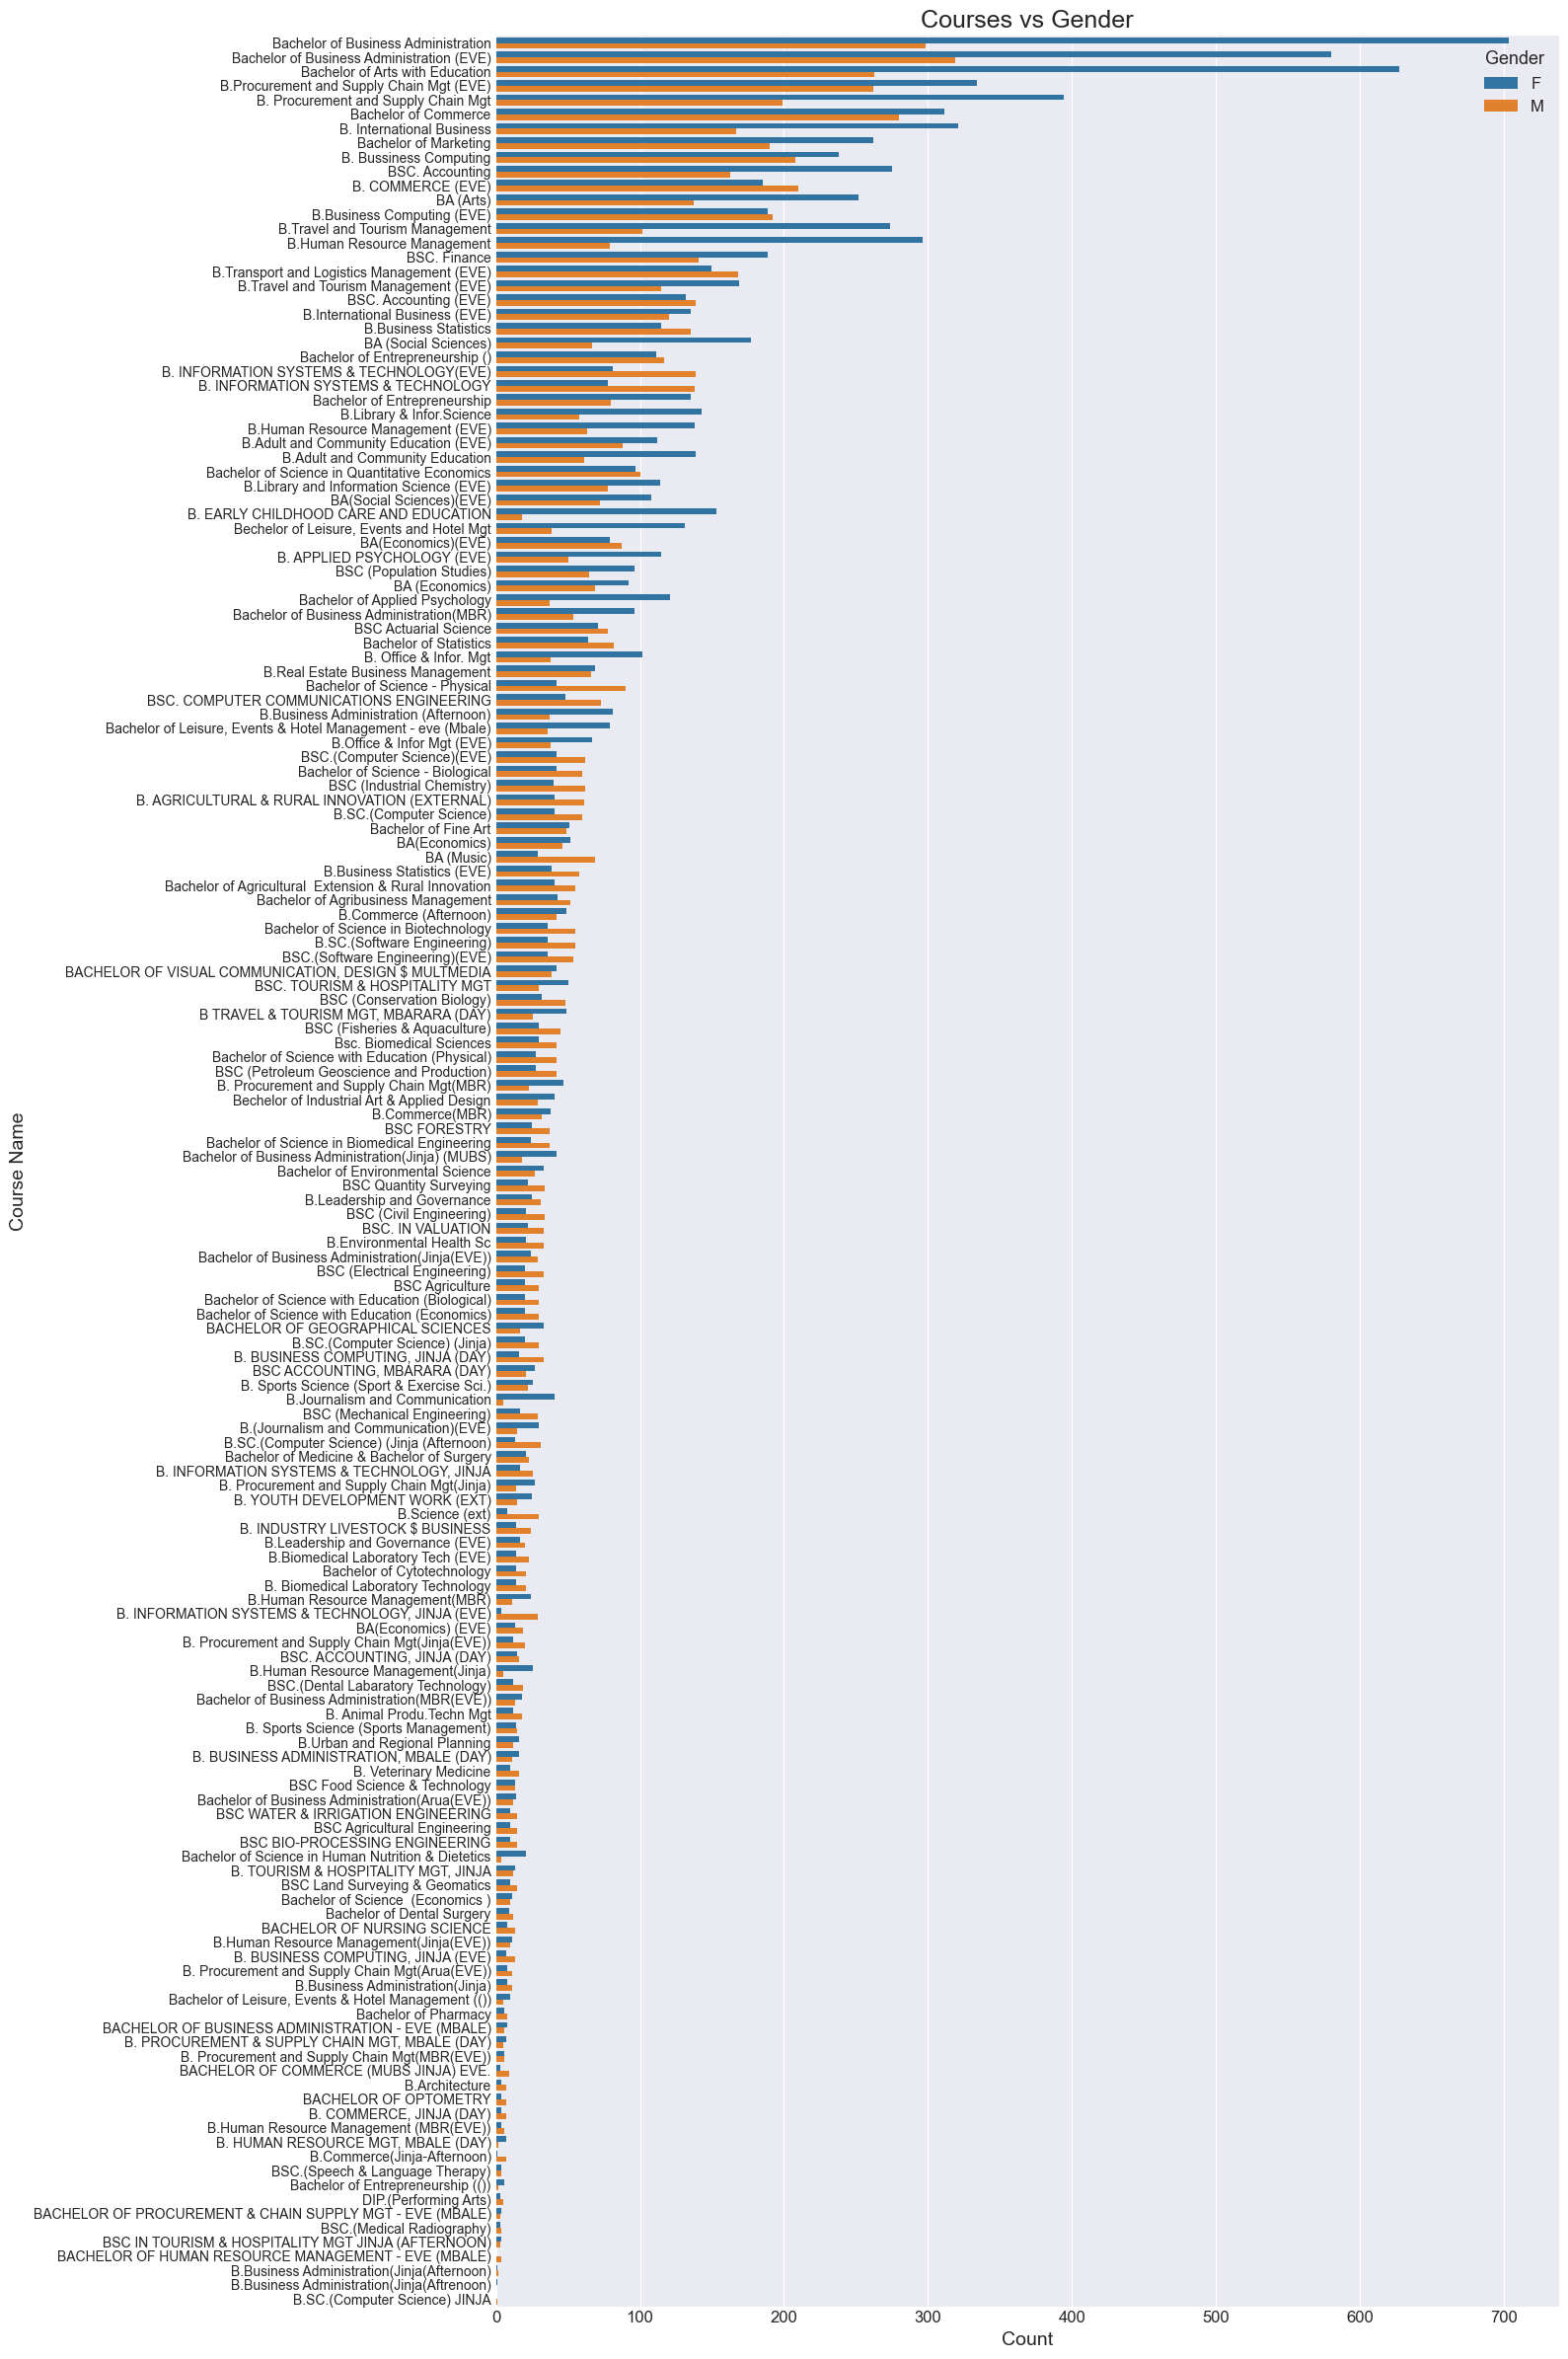

In [7]:
plt.figure(figsize=(16, 24))  # Wider and much taller for all courses
sns.countplot(
    data=df,
    y='course_name',
    hue='ge',
    order=df['course_name'].value_counts().index
)
plt.title('Courses vs Gender', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Course Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.legend(title='Gender', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()


## Courses vs Cluster Distribution (Heatmap)

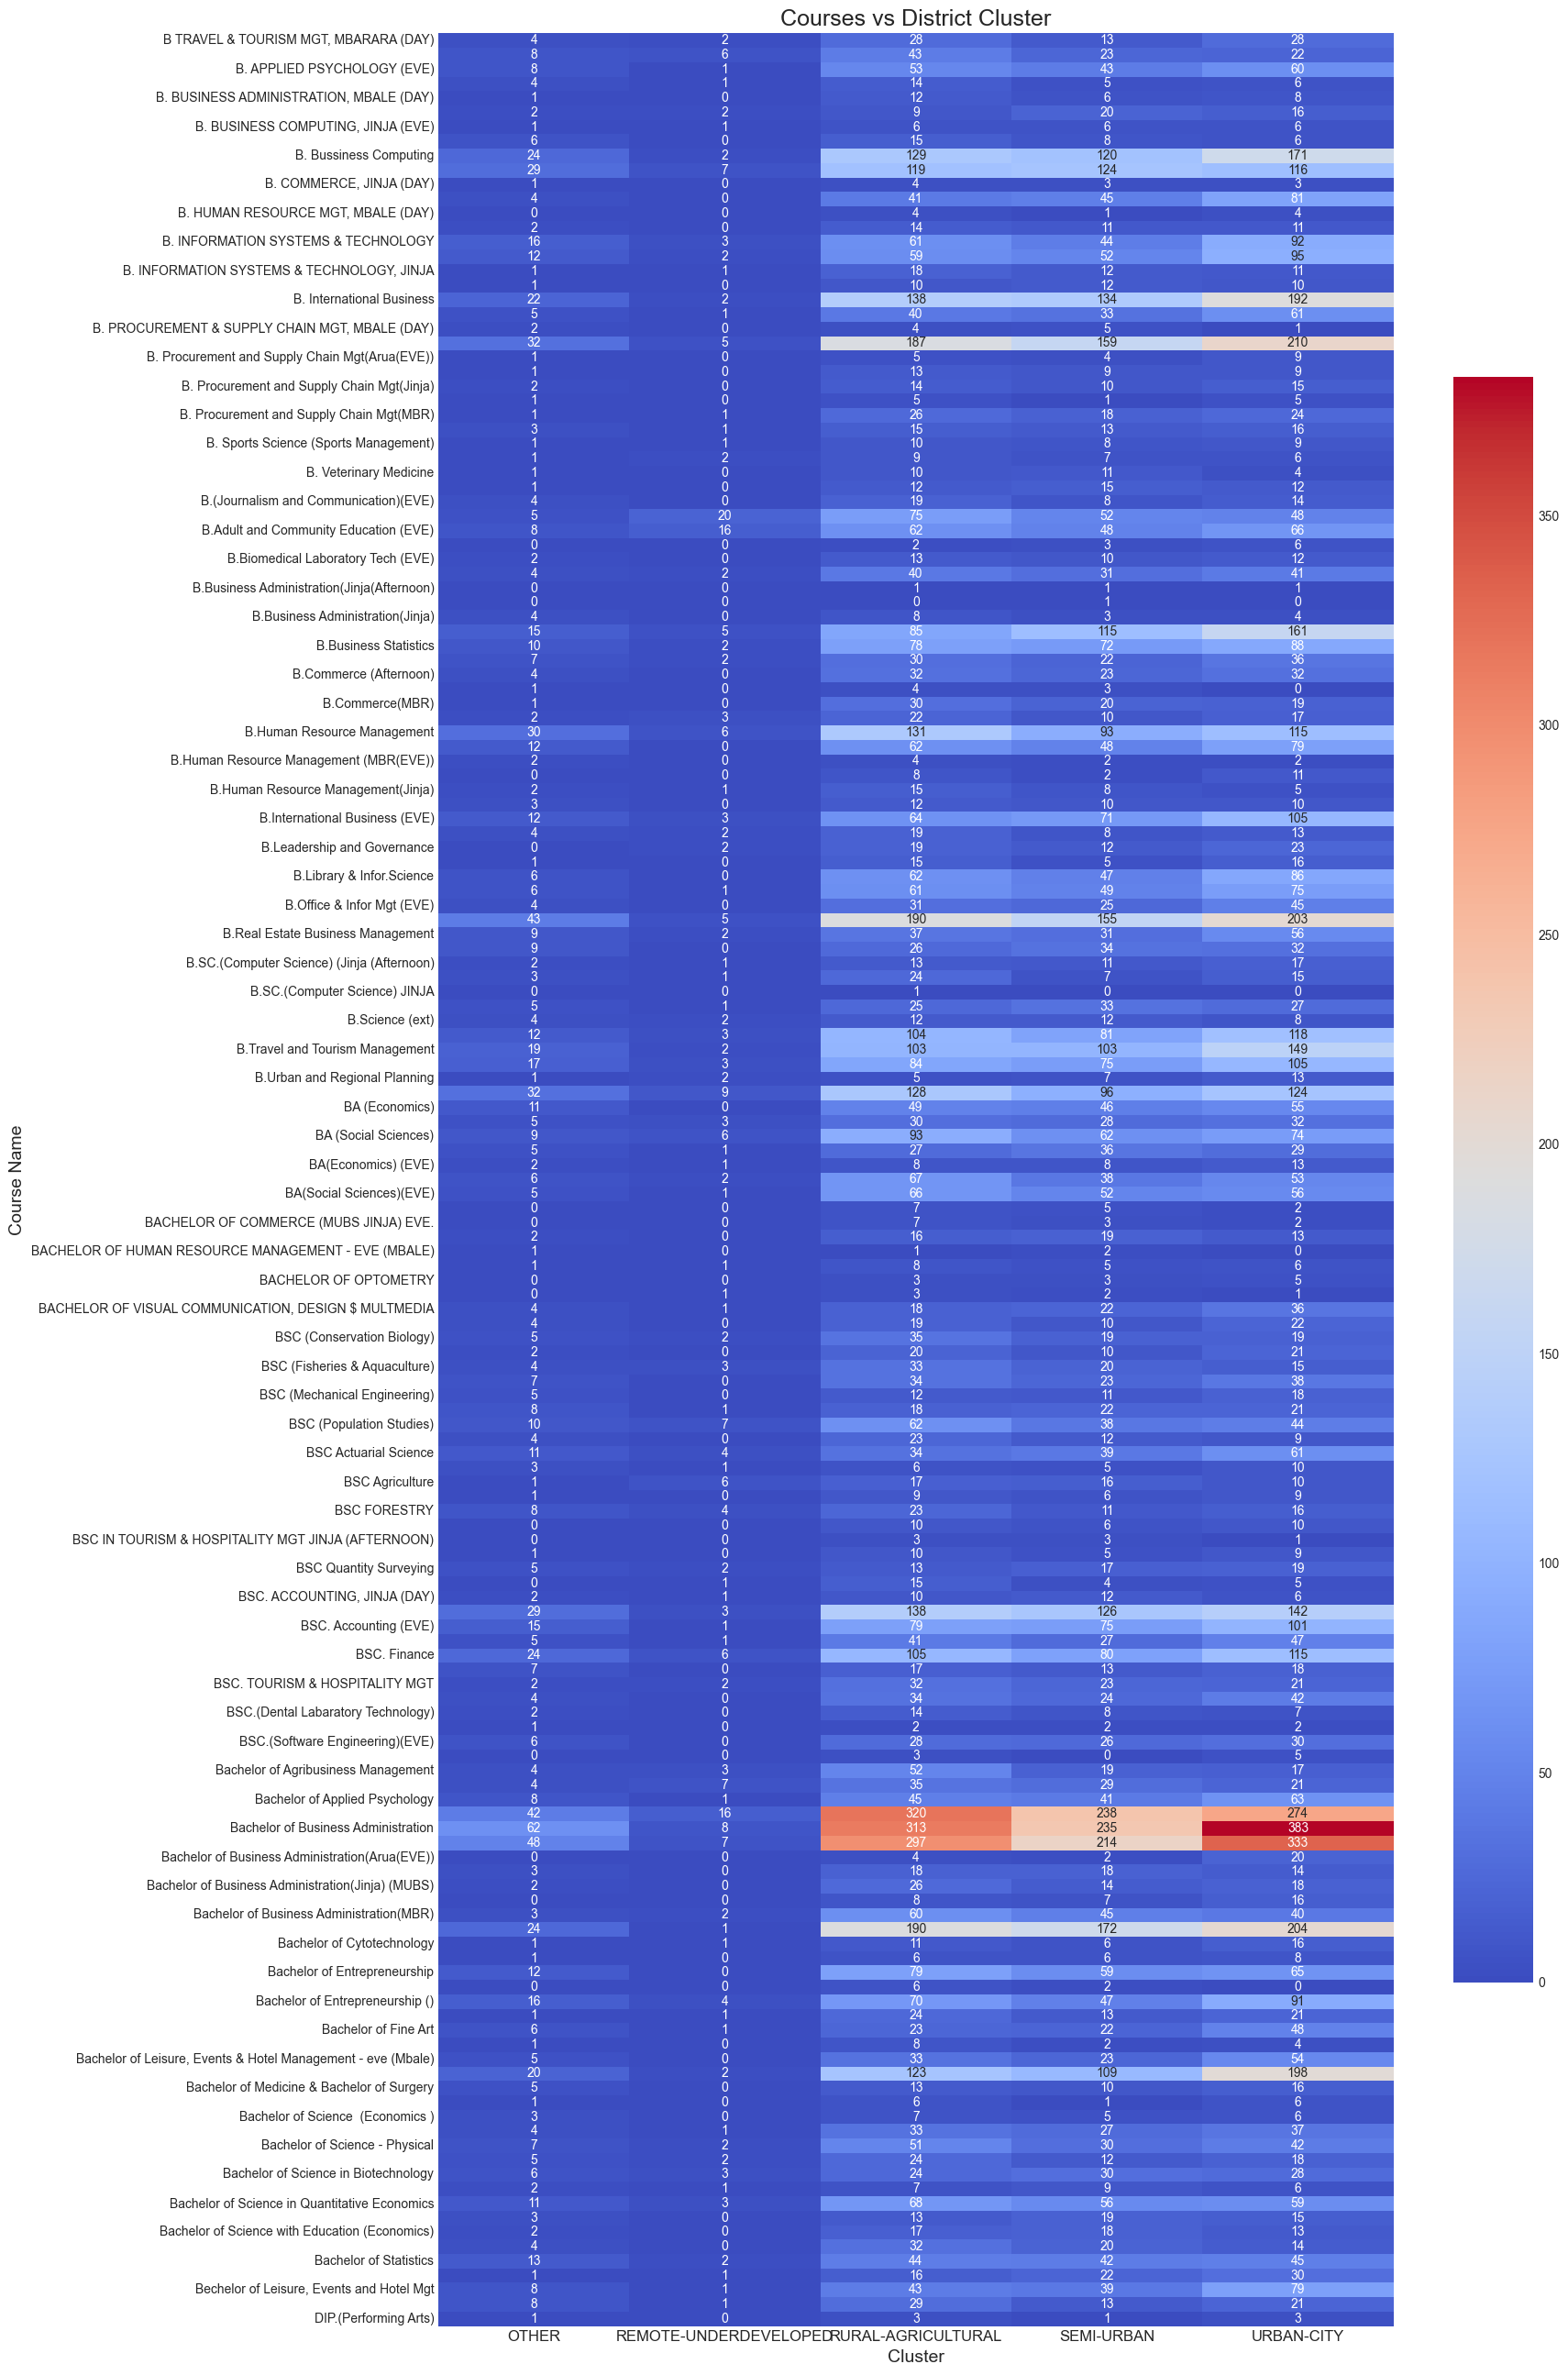

In [8]:
cluster_course = df.pivot_table(index='course_name', columns='cluster', aggfunc='size', fill_value=0)

plt.figure(figsize=(18, 26))  # Increased width and height for better spacing
sns.heatmap(
    cluster_course,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    annot_kws={"size": 10},     # Font size for annotations
    cbar_kws={"shrink": 0.7}    # Shrink colorbar for better fit
)

plt.title('Courses vs District Cluster', fontsize=18)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Course Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Estimated Chance of Admission Table (Simulated)
*This is a simplified estimate based on proportions*

In [9]:
# Create simulated probability by grouping
chances = df.groupby(['ge', 'cluster']).size().reset_index(name='Count')
chances['Admission Chance (%)'] = 100 * chances['Count'] / chances['Count'].sum()
chances

,ge,cluster,Count,Admission Chance (%)
0,F,OTHER,596,3.014974
1,F,REMOTE-UNDERDEVELOPED,128,0.647511
2,F,RURAL-AGRICULTURAL,3519,17.801497
3,F,SEMI-URBAN,2944,14.892756
4,F,URBAN-CITY,4094,20.710239
5,M,OTHER,481,2.433225
6,M,REMOTE-UNDERDEVELOPED,142,0.718333
7,M,RURAL-AGRICULTURAL,2847,14.402064
8,M,SEMI-URBAN,2179,11.022865
9,M,URBAN-CITY,2838,14.356536
